#시작

### 1. 환경 준비 

In [1]:
from tensorflow.keras.models import Sequential  # 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.layers import Dense       # 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [2]:
!git clone https://github.com/taehojo/data.git   # 깃허브에 준비된 데이터를 가져옵니다.

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")  # 수술 환자 데이터를 불러옵니다.
X = Data_set[:,0:16]                                                 # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]                                                   # 수술 후 사망/생존 여부를 y로 지정합니다.

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


### 3. 구조 결정 

In [3]:
model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 4. 모델 실행 

In [4]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 딥러닝 모델을 실행합니다.
history=model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 1ms/step - loss: 1.7013 - accuracy: 0.8511
Epoch 2/5
30/30 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.8383
Epoch 3/5
30/30 [==============================] - 0s 1ms/step - loss: 0.4429 - accuracy: 0.8489
Epoch 4/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 4ms/step - loss: 0.4359 - accuracy: 0.8511


# 가장 훌륭한 예측선

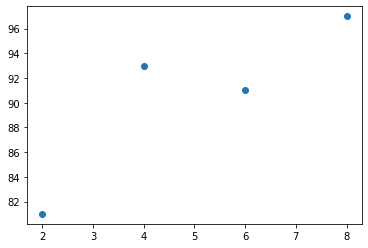

In [16]:
import matplotlib.pyplot as plt

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

plt.scatter(x, y)
plt.show()

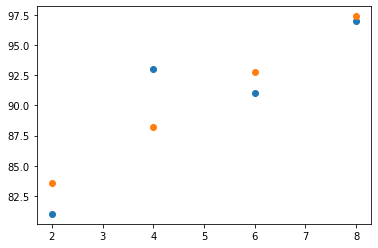

In [18]:
y_pred = [83.6, 88.2, 92.8, 97.4]

plt.scatter(x,y)
plt.scatter(x,y_pred)
plt.show()

# 파이썬 코딩으로 확인하는 최소제곱



In [17]:
import numpy as np


# 공부한 시간과 점수를 각각 x, y라는 이름의 넘파이 배열로 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 


#x의 평균값을 구합니다.
mx = np.mean(x)

#y의 평균값을 구합니다.
my = np.mean(y)

# 출력으로 확인합니다.
print("x의 평균값:", mx)
print("y의 평균값:", my)



# 기울기 공식의 분모 부분입니다.
divisor = sum([(i - mx)**2 for i in x])

# 기울기 공식의 분자 부분입니다.
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

# 출력으로 확인합니다.
print("분모:", divisor)
print("분자:", dividend)



# 기울기 a를 구하는 공식입니다.
a = dividend / divisor

# y 절편 b를 구하는 공식입니다.
b = my - (mx*a)

# 출력으로 확인합니다.
print("기울기 a =", a)
print("y절편 b =", b)

x의 평균값: 5.0
y의 평균값: 90.5
분모: 20.0
분자: 46.0
기울기 a = 2.3
y절편 b = 79.0


# 파이썬 코딩으로 확인하는 평균 제곱 오차

In [19]:
import numpy as np


# 가상의 기울기 a와 y 절편 b를 정합니다.
fake_a=3
fake_b=76

# 공부 시간 x와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 


# y=ax + b에 가상의 a,b 값을 대입한 결과를 출력하는 함수입니다.
def predict(x):
    return fake_a * x + fake_b

# 예측 값이 들어갈 빈 리스트를 만듭니다.
predict_result = []

# 모든 x 값을 한 번씩 대입하여 predict_result 리스트를 완성합니다.
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))


# 평균 제곱 오차 함수를 각 y 값에 대입하여 최종 값을 구하는 함수입니다.
n=len(x)  
def mse(y, y_pred):
    return (1/n) * sum((y - y_pred)**2)

# 평균 제곱 오차 값을 출력합니다.
print("평균 제곱 오차: " + str(mse(y,predict_result)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
평균 제곱 오차: 11.0


# 파이썬 코딩으로 확인하는 선형 회귀

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


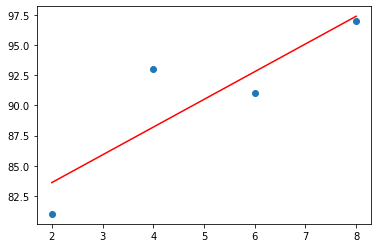

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 


# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다. 
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n=len(x)


# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))        


# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b      

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

# 파이썬 코딩으로 확인하는 다중 선형 회귀

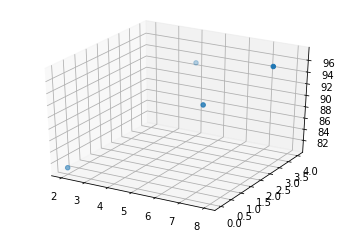

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [22]:
import numpy as np
import matplotlib.pyplot as plt


# 공부 시간 x1과 과외 시간 x2, 그 성적 y의 넘파이 배열을 만듭니다. 
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 


# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()


# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 


# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       # 예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 

    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))      


# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

# 텐서플로로 실행하는 선형회귀

Epoch 1/2000
1/1 [==============================] - 0s 330ms/step - loss: 9908.7881
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 2281.6167
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 1156.0713
Epoch 4/2000
1/1 [==============================] - 0s 5ms/step - loss: 985.4869
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 955.1966
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 945.5458
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 938.9603
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 932.8582
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 926.8606
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 920.9111
Epoch 11/2000
1/1 [==============================] - 0s 13ms/step - loss: 915.0017
Epoch 12/2000
1/1 [==============================] - 0s 8ms/step - loss: 909.1309
Epoch 13/2000
1/1

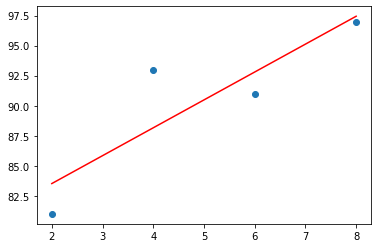

7시간을 공부할 경우의 예상 점수는 95.12점입니다


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 


model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)


plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')    # 예측 결과를 그래프로 나타냅니다.
plt.show()


# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))

# 텐서플로로 실행하는 다중 선형 회귀

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 


model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd' ,loss='mse')

model.fit(x, y, epochs=2000)


# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

Epoch 1/2000
1/1 [==============================] - 0s 196ms/step - loss: 8986.0859
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 1489.3984
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 956.7147
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 913.8428
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 905.4543
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 899.5256
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 893.8043
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 888.1317
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 882.4964
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 876.8974
Epoch 11/2000
1/1 [==============================] - 0s 5ms/step - loss: 871.3343
Epoch 12/2000
1/1 [==============================] - 0s 5ms/step - loss: 865.8068
Epoch 13/2000
1/1 [==

# 텐서플로에서 실행하는 로지스틱 회귀 모델

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 5ms/step - loss: 0.2599
Epoch 2502/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2599
Epoch 2503/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2599
Epoch 2504/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 2505/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2598
Epoch 2506/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2597
Epoch 2507/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2597
Epoch 2508/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.2596
Epoch 2509/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2596
Epoch 2510/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2595
Epoch 2511/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2595
Epoch 2512/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2

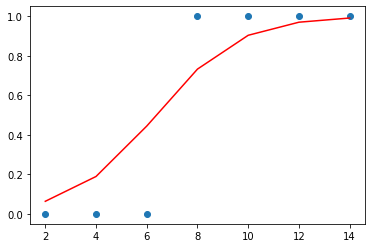

7시간을 공부할 경우, 합격 예상 확률은 59.7%입니다


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1]) 


model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 교차 엔트로피 오차 함수를 이용하기 위하여 'binary_crossentropy'로 설정합니다. 
model.compile(optimizer='sgd' ,loss='binary_crossentropy')
model.fit(x, y, epochs=5000)


# 그래프로 확인해 봅니다.
plt.scatter(x, y)
plt.plot(x, model.predict(x),'r')
plt.show()


# 임의의 학습 시간을 집어넣어 합격 예상 확률을 예측해 보겠습니다.
hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우, 합격 예상 확률은 %.01f%%입니다" % (hour, prediction * 100))